**Parte 6. Clasificador GNB Multiclase**

Entradas (features): Thumb, Index, Middle, Ring, Pinky

Salida (target): Liesle, Winston, Catherine, Cristian, Mauro, Mario (Multiclass)

Dataset:  Glove_train.csv

**Contenido**

*   Importacion de librerias
*   Creacion de Dataframe: identificacion de etiquetas, balance de datos y  busqueda de valores null
*   Conversion de valores categoricos a numericos (mapeo)
*   Normalizacion de caracteristicas
*   Implementacion del modelo: entrenamiento y validacion
*   Resultados
*   Conclusiones
*   Anexos

**Importacion de librerias**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Creacion de Dataframe a partir de Glove_train.csv**

A partir del dataset en formato CSV se dispone de 5 features y 3 targets, por lo que es necesario definir un problema de clasificacion para cada uno de las salidas: Gesture, Hand y Subject. 

In [ ]:
data = '/content/Glove_train.csv'
df3 = pd.read_csv(data)
df3 = df3.drop(['id','Gesture', 'Hand'], axis=1)
df3.head()

Thumb     Index    Middle      Ring     Pinky    Subject
0  0.898072  0.043478  0.228420  0.968593  0.910390     Liesle
1  0.647410  0.967136  0.971925  0.652116  0.905983    Winston
2  0.087201  0.000000  0.087087  0.052713  0.102964  Catherine
3  0.672886  0.933579  0.970787  0.939791  0.997195   Cristian
4  0.089119  0.135849  0.096421  0.087786  0.072082     Liesle

Identificacion de etiquetas, balance de los datos y busqueda de valores null dentro del Dataframe:
(https://pandas.pydata.org/docs/reference/api/pandas.unique.html, https://sparkbyexamples.com/pandas/pandas-check-if-any-value-is-nan-in-a-dataframe/)

In [ ]:
df3['Subject'].unique()

array(['Liesle', 'Winston', 'Catherine', 'Cristian', 'Mauro', 'Mario'],
      dtype=object)

In [ ]:
df3.isnull().values.any()

False

In [ ]:
df3['Subject'].value_counts()

Mauro        8462
Mario        8446
Catherine    8437
Cristian     8373
Liesle       8348
Winston      8334
Name: Subject, dtype: int64

Conversion de variables categoricas a variables numericas para facilitar la implementacion del algoritmo de clasificacion: 

In [ ]:
df3['Subject'] = df3['Subject'].map({'Liesle' :0, 'Winston' :1, 'Catherine' :2, 'Cristian' :3, 'Mauro' :4, 'Mario' :5}).astype(int) #mapping numbers
df3.head()

Thumb     Index    Middle      Ring     Pinky  Subject
0  0.898072  0.043478  0.228420  0.968593  0.910390        0
1  0.647410  0.967136  0.971925  0.652116  0.905983        1
2  0.087201  0.000000  0.087087  0.052713  0.102964        2
3  0.672886  0.933579  0.970787  0.939791  0.997195        3
4  0.089119  0.135849  0.096421  0.087786  0.072082        0

**Normalizacion de caracteristicas (features)**

Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
x_data = df3.drop(['Subject'],axis=1)
y_data = df3['Subject']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
data.head()

Thumb     Index    Middle      Ring     Pinky
0  0.898072  0.043478  0.228420  0.968593  0.910390
1  0.647410  0.967136  0.971925  0.652116  0.905983
2  0.087201  0.000000  0.087087  0.052713  0.102964
3  0.672886  0.933579  0.970787  0.939791  0.997195
4  0.089119  0.135849  0.096421  0.087786  0.072082

**Implementacion clasificador por medio de algoritmo Bayes Naive Gausiano: entrenamiento y validacion**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.3, random_state = 1)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([2, 1, 1, ..., 2, 1, 1])

**Resultados**

classification_report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[ 619  879 1070    0   23    0]
 [ 297 1183  993   78    0    0]
 [ 413  840 1267    0    0    0]
 [ 373  856 1287    3    0    0]
 [ 347  808 1209    0  102    0]
 [ 366  821 1082    0    0  204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.24      0.25      2591
           1       0.22      0.46      0.30      2551
           2       0.18      0.50      0.27      2520
           3       0.04      0.00      0.00      2519
           4       0.82      0.04      0.08      2466
           5       1.00      0.08      0.15      2473

    accuracy                           0.22     15120
   macro avg       0.42      0.22      0.17     15120
weighted avg       0.41      0.22      0.18     15120

Accuracy: 0.22341269841269842


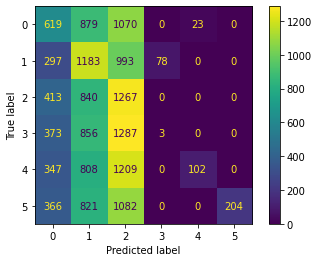

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.show()

**Conclusiones**

**Anexos**

<AxesSubplot:xlabel='Thumb', ylabel='Index'>

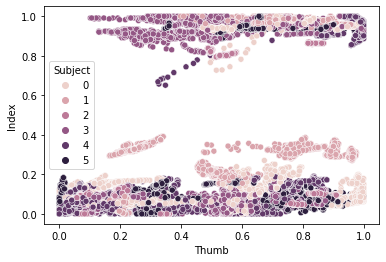

In [ ]:
sns.scatterplot(x=df3['Thumb'],y=df3['Index'], hue=df3['Subject'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
# Datos
D = '/content/Glove_train.csv'
DF = pd.read_csv(D)
DF = DF.drop(['id','Hand','Gesture'], axis=1)

# Fin datos
DF['Subject'] = DF['Subject'].map({'Liesle' :0, 'Winston' :1, 'Catherine' :2, 'Cristian' :3, 'Mauro' :4, 'Mario' :5}).astype(int) #mapping numbers

X = DF.drop(['Subject'],axis=1)
Y = DF['Subject']

DF.head()

Thumb     Index    Middle      Ring     Pinky  Subject
0  0.898072  0.043478  0.228420  0.968593  0.910390        0
1  0.647410  0.967136  0.971925  0.652116  0.905983        1
2  0.087201  0.000000  0.087087  0.052713  0.102964        2
3  0.672886  0.933579  0.970787  0.939791  0.997195        3
4  0.089119  0.135849  0.096421  0.087786  0.072082        0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.23327664 0.21683673 0.22052154 0.22080499 0.21683673 0.21712018
 0.20975057 0.22732426 0.22675737 0.2196712 ]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.2209
